# Data analysis of Moon crater dimensions and properties

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing data
Read the associated paper [here](http://dx.doi.org/10.1029/2018JE005592). The dataset consists of the set of columns described in Appendix A on page 27.

- `CRATER_ID` — Catalog identifier string of the form `XX-X-XXXXXX`.
-` LAT_CIRC_IMG` — North latitude in decimal degrees from a circle fit.
- `LON_CIRC_IMG` — East longitude in decimal degrees from a circle fit, in the 0–360° domain.
- `LAT_ELLI_IMG` — North latitude in decimal degrees from an ellipse fit.
- `LON_ELLI_IMG` — East longitude in decimal degrees from an ellipse fit, in 0–360° domain.
- `DIAM_CIRC_IMG` — Diameter in kilometers from a circle fit.
- `DIAM_CIRC_SD_IMG` — Standard deviation of kilometers of the fit residuals. Each manual rim point’s distance from the crater center was calculated and subtracted from the best-fit radius, and this value is the standard deviation of those differences.
- `DIAM_ELLI_MAJOR_IMG` — Major axis in kilometers from an ellipse fit.
- `DIAM_ELLI_MINOR_IMG` — Minor axis in kilometers from an ellipse fit.
- `DIAM_ELLI_ECCEN_IMG` — Eccentricity (unitless) of the ellipse, calculated as $\displaystyle \sqrt{1-\frac{b^2}{a^2}}$ where a is the major and b the minor axes.
- `DIAM_ELLI_ELLIP_IMG` — Ellipticity (unitless) of the ellipse, calculated as $\displaystyle \frac{a}{b}$.
- `DIAM_ELLI_ANGLE_IMG` — Angle of the fitted ellipse in degrees, counterclockwise from the major axis oriented East-West.
- `LAT_ELLI_SD_IMG` — Formal standard error in the ellipse fit’s center latitude, in degrees.
- `LON_ELLI_SD_IMG` — Formal standard error in the ellipse fit’s center longitude, in degrees.
- `DIAM_ELLI_MAJOR_SD_IMG` — Formal standard error in the ellipse fit’s major axis, in kilometers.
- `DIAM_ELLI_MINOR_SD_IMG` — Formal standard error in the ellipse fit’s minor axis, in kilometers.
- `DIAM_ELLI_ECCEN_SD_IMG` — Formal standard error in the ellipse fit’s eccentricity (unitless). Uses the method of adding in quadrature, defined as $\displaystyle \Delta\epsilon = \sqrt{\left(\frac{b^2}{a^3}\frac{1}{\sqrt{1-b^2/a^2}}\Delta a\right)^2 + \left(-\frac{b^2}{a}\frac{1}{\sqrt{1-b^2/a^2}}\Delta b\right)^2}$.
- `DIAM_ELLI_ELLIP_SD_IMG` — Formal standard error in the ellipse fit’s ellipticity (unitless). Uses the method of adding in quadrature, defined as $\displaystyle \Delta e = \sqrt{\left(\frac{1}{b}\Delta a\right)^2 + \left(-\frac{a}{b^2}\Delta b\right)^2}$.
- `DIAM_ELLI_ANGLE_SD_IMG` — Formal standard error in the ellipse fit’s tilt angle, in degrees.
- `ARC_IMG` — An estimation of the fraction of the complete rim that was traced. See section 3.5 for more detail.
- `PTS_RIM_IMG` — Number of manual points used to identify the crater rim and calculate the circle and ellipse fits.

In [3]:
PATH_TO_CSV = "~/Downloads/lunar_crater_database_robbins_2018.csv"
df = pd.read_csv(PATH_TO_CSV)

df.head()

,CRATER_ID,LAT_CIRC_IMG,LON_CIRC_IMG,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_CIRC_IMG,DIAM_CIRC_SD_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ECCEN_IMG,...,DIAM_ELLI_ANGLE_IMG,LAT_ELLI_SD_IMG,LON_ELLI_SD_IMG,DIAM_ELLI_MAJOR_SD_IMG,DIAM_ELLI_MINOR_SD_IMG,DIAM_ELLI_ANGLE_SD_IMG,DIAM_ELLI_ECCEN_SD_IMG,DIAM_ELLI_ELLIP_SD_IMG,ARC_IMG,PTS_RIM_IMG
0,00-1-000000,-19.83040,264.7570,-19.89050,264.6650,940.960,21.31790,975.874,905.968,0.371666,...,35.9919,0.007888,0.008424,0.636750,0.560417,0.373749,0.002085,0.000968,0.568712,8088
1,00-1-000001,44.77630,328.6020,44.40830,329.0460,249.840,5.99621,289.440,245.786,0.528111,...,127.0030,0.011178,0.015101,1.052780,0.209035,0.357296,0.005100,0.004399,0.627328,2785
2,00-1-000002,57.08660,82.0995,56.90000,81.6464,599.778,21.57900,632.571,561.435,0.460721,...,149.1620,0.008464,0.019515,0.776149,0.747352,0.374057,0.003095,0.002040,0.492373,5199
3,00-1-000003,1.96124,230.6220,1.95072,230.5880,558.762,14.18190,568.529,546.378,0.276416,...,133.6910,0.007079,0.007839,0.526945,0.532872,1.262710,0.004496,0.001400,0.595221,4341
4,00-1-000004,-49.14960,266.3470,-49.18330,266.3530,654.332,17.50970,665.240,636.578,0.290365,...,87.6468,0.008827,0.017733,0.568958,0.758631,1.383530,0.004626,0.001533,0.545924,5933


## Eccentricity distribution

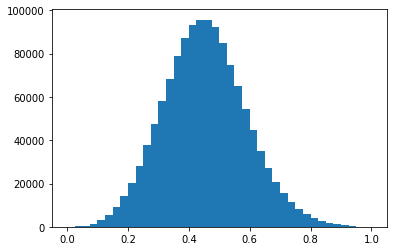

In [26]:
%matplotlib inline

eccentricities = df["DIAM_ELLI_ECCEN_IMG"]

plt.hist(eccentricities, bins=np.linspace(0,1,41)) # bin size = 0.025
plt.show()

## Major axis diameter distribution (km) and circle fit diameter distribution (km)

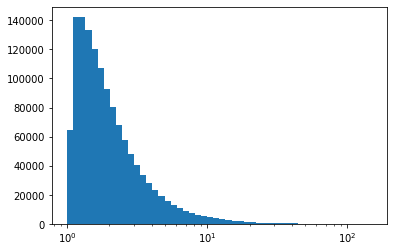

In [41]:
%matplotlib inline
major_axes = df["DIAM_ELLI_MAJOR_IMG"].dropna()
plt.xscale("log")
plt.hist(major_axes, bins=np.exp(np.linspace(0,5,51))) # bin size = e^0.1
plt.show()

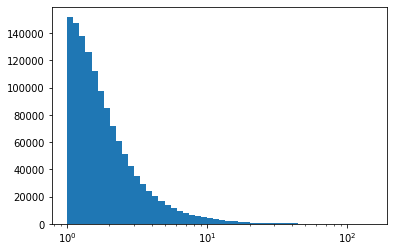

In [40]:
%matplotlib inline
circle_diameters = df["DIAM_CIRC_IMG"].dropna()
plt.xscale("log")
plt.hist(circle_diameters, bins=np.exp(np.linspace(0,5,51))) # bin size = e^0.1
plt.show()

In [43]:
print("MAJOR_AXES:", np.average(major_axes), np.std(major_axes))
print("CIRCLE_DIAMETERS:", np.average(circle_diameters), np.std(circle_diameters))

MAJOR_AXES: 2.6046947061093895 5.787464222230638
CIRCLE_DIAMETERS: 2.436963377709368 5.519131133582032
